## Questionário 1
2ª Tentativa

In [53]:
import pandas as pd

caminho = './'
nome_arquivo = 'ds_chuva_sm_2011_2020_3.csv'
df = pd.read_csv(caminho + nome_arquivo, sep = ';', decimal = ',')

# verificando tipo de dados em cada coluna
display(df.info())

quant_datas_nulo = df['DT_MEDICAO'].isna().sum()
quant_horas_nulo = df['HR_MEDICAO'].isna().sum()
quant_chuva_nulo = df['CHUVA'].isna().sum()

print("Registros nulos de dados:")
print("Campo DT_MEDICAO", quant_datas_nulo)
print("Campo DT_MEDICAO", quant_horas_nulo)
print("Campo CHUVA", quant_chuva_nulo)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48911 entries, 0 to 48910
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CD_ESTACAO  48911 non-null  object 
 1   DT_MEDICAO  48911 non-null  object 
 2   HR_MEDICAO  48911 non-null  int64  
 3   CHUVA       43683 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 1.5+ MB


None

Registros nulos de dados:
Campo DT_MEDICAO 0
Campo DT_MEDICAO 0
Campo CHUVA 5228


# Questão 1

## a) Calcule e apresente o dia (1-{28,29,30,31}) que teve a maior precipitacao no mês 1, do ano 2011.

In [1]:
import pandas as pd

caminho = './'
nome_arquivo = 'ds_chuva_sm_2011_2020_3.csv'
df = pd.read_csv(caminho + nome_arquivo, sep = ';', decimal = ',')

# convertendo para datetime
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'])
# display(df.info())

filtro = (df['DT_MEDICAO'] >=
          '2011-01-01') & (df['DT_MEDICAO'] <= '2011-01-31')

# filtrado apenas dados de janeiro de 2011
df_2011_01 = df[filtro]

# apagando dados nulos
df_2011_01 = df_2011_01.dropna()

# apagando colunas desnecessárias
df_duas_colunas = df_2011_01.drop(['CD_ESTACAO', 'HR_MEDICAO'], axis=1)

# agrupando e somando volume diario
df_quant_diaria = df_duas_colunas.groupby(
    pd.Grouper(key='DT_MEDICAO', freq='D'))['CHUVA'].sum()

display(df_quant_diaria)

maior_dia = df_quant_diaria.idxmax()
maior_valor = df_quant_diaria.max(axis=0)

display("Maior quantidade de chuva registrada no dia: " + str(maior_dia))
display("Quantidade máxima registrada : " + str(maior_valor))


DT_MEDICAO
2011-01-01     0.0
2011-01-02    39.2
2011-01-03     0.0
2011-01-04     0.0
2011-01-05    13.0
2011-01-06     0.0
2011-01-07     0.0
2011-01-08    10.0
2011-01-09     0.2
2011-01-10     0.0
2011-01-11     1.2
2011-01-12     5.6
2011-01-13     0.0
2011-01-14     0.0
2011-01-15     0.0
2011-01-16     0.0
2011-01-17     3.4
2011-01-18     1.0
2011-01-19     0.0
2011-01-20     0.0
2011-01-21     0.0
2011-01-22     0.0
2011-01-23     0.0
2011-01-24     0.0
2011-01-25     0.0
2011-01-26    36.4
2011-01-27     9.0
2011-01-28     0.0
2011-01-29     0.0
2011-01-30     0.0
2011-01-31     0.0
Freq: D, Name: CHUVA, dtype: float64

'Maior quantidade de chuva registrada no dia: 2011-01-02 00:00:00'

'Quantidade máxima registrada : 39.2'

## b) Calcule e apresente a precipitação acumulada para a hora 0, do mês 3, no ano 2020.
Considere que devem ser somadas as precipitações de todas as 0 hora(s), de todos os dias do mês 3, no ano 2020.

In [2]:
import pandas as pd

caminho = './'
nome_arquivo = 'ds_chuva_sm_2011_2020_3.csv'
df = pd.read_csv(caminho + nome_arquivo, sep = ';', decimal = ',')

# convertendo para datetime
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'])
# display(df.info())

filtro = (df['DT_MEDICAO'] >=
          '2020-03-01') & (df['DT_MEDICAO'] <= '2020-03-31') & (df['HR_MEDICAO'] == 0) 

# filtrado apenas dados de março de 2020 com hora 0
df_2020_03 = df[filtro]

display(df_2020_03)

# apagando dados nulos
df_2020_03 = df_2020_03.dropna()

# apagando colunas desnecessárias
df_duas_colunas = df_2020_03.drop(['CD_ESTACAO', 'DT_MEDICAO'], axis=1)

# agrupando e somando volume diario
df_quant_diaria = df_duas_colunas.groupby(
    pd.Grouper(key='HR_MEDICAO'))['CHUVA'].sum()

display(df_quant_diaria)

maior_valor = df_quant_diaria.max(axis=0)

display("Quantidade registrada no horário foi de : " + str(maior_valor))


,CD_ESTACAO,DT_MEDICAO,HR_MEDICAO,CHUVA
44765,A803,2020-03-01,0,0.0
44780,A803,2020-03-02,0,0.0
44806,A803,2020-03-04,0,0.0
44849,A803,2020-03-07,0,0.0
44865,A803,2020-03-08,0,0.0
44882,A803,2020-03-09,0,0.0
44945,A803,2020-03-15,0,0.0
44956,A803,2020-03-16,0,0.0
44969,A803,2020-03-17,0,0.0
45013,A803,2020-03-20,0,0.0


HR_MEDICAO
0    0.0
Name: CHUVA, dtype: float64

'Quantidade registrada no horário foi de : 0.0'

# Questão 2
Com base no "dataset" da questão anterior, desenvolva o histograma com a precipitação acumulada nos meses de um dos anos do intervalo 2011-2020 (escolha um dos anos).



array([[<AxesSubplot:title={'center':'DT_MEDICAO'}>,
        <AxesSubplot:title={'center':'HR_MEDICAO'}>],
       [<AxesSubplot:title={'center':'CHUVA'}>, <AxesSubplot:>]],
      dtype=object)

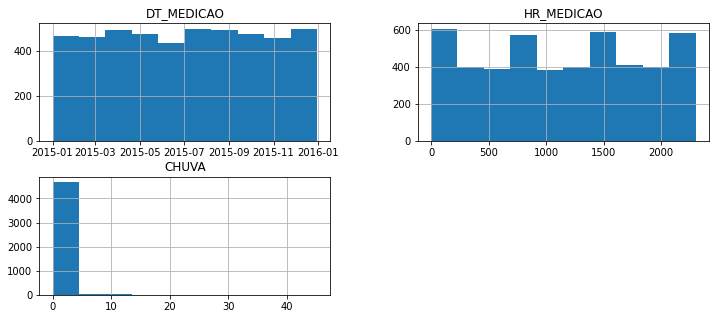

In [23]:
import pandas as pd

caminho = './'
nome_arquivo = 'ds_chuva_sm_2011_2020_3.csv'
df = pd.read_csv(caminho + nome_arquivo, sep = ';', decimal = ',')

# convertendo para datetime
df['DT_MEDICAO'] = pd.to_datetime(df['DT_MEDICAO'])
# display(df.info())

filtro = (df['DT_MEDICAO'] >=
          '2015-01-01') & (df['DT_MEDICAO'] <= '2015-12-31')

# filtrado apenas dados de março de 2015 com hora 0
df_2015 = df[filtro]

# apagando dados nulos
df_2015 = df_2015.dropna()

# apagando colunas desnecessárias
df_filtrado = df_2015.drop(['CD_ESTACAO'], axis=1)


df_filtrado.hist(figsize=[12,5])